# importar las librerias


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
import joblib



# cargar el dataset

In [5]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# ver cuantos valores M y B hay en diagnosis
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# procesamiento inicial



In [9]:

# Eliminar columnas innecesarias
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Convertir diagnosis a binario
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# renombrar columnas para que no tengan espacios
df.columns = df.columns.str.replace(" ", "_")


# visualizamos las correlaciones para elegir las columnas relevantes

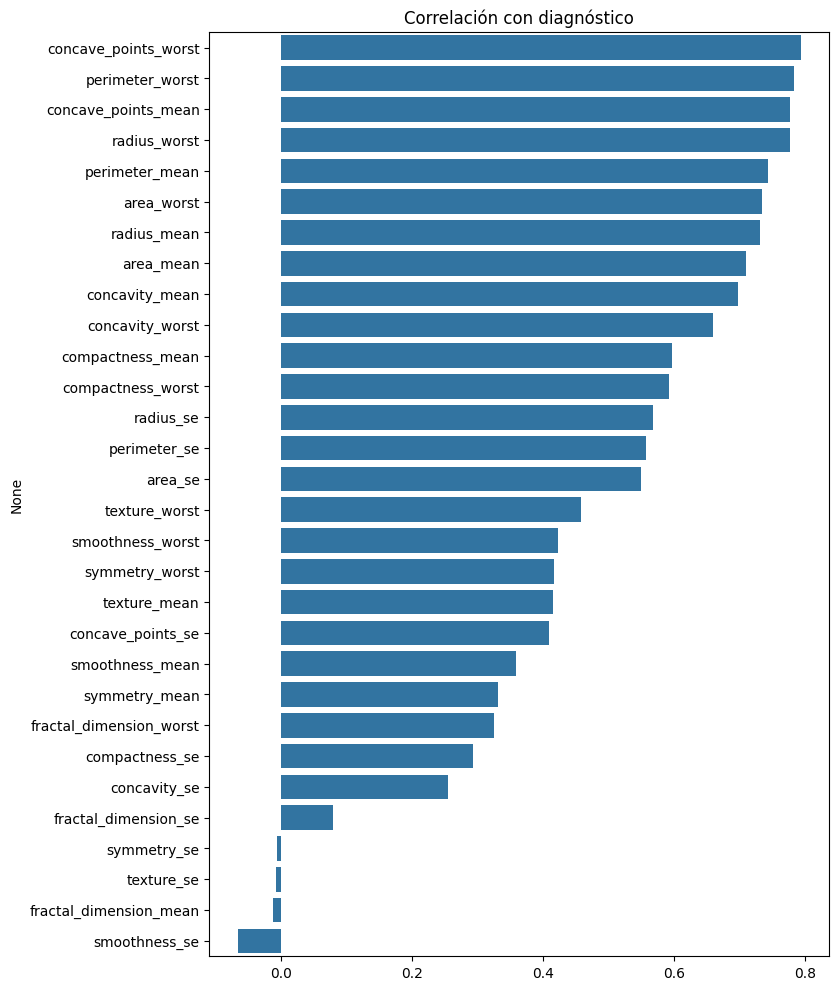

In [10]:
correlation = df.corr()["diagnosis"].drop("diagnosis").sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Correlación con diagnóstico")
plt.show()


# seleccionamos las 10 columnas más relacionadas

In [11]:
columnas_top10 = [
    "concave_points_worst",
    "perimeter_worst",
    "concave_points_mean",
    "radius_worst",
    "perimeter_mean",
    "area_worst",
    "radius_mean",
    "area_mean",
    "concavity_mean",
    "concavity_worst"
]

X = df[columnas_top10]
y = df["diagnosis"]


# dividimos los datos en train y test con stratify=y

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Entrenamos al modelo 

In [13]:
modelo = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
modelo.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


# Evaluar el modelo

In [14]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", round(accuracy * 100, 2), "%")

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión: 95.61 %
Matriz de confusión:
[[71  1]
 [ 4 38]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Visualización del rendimiento del modelo

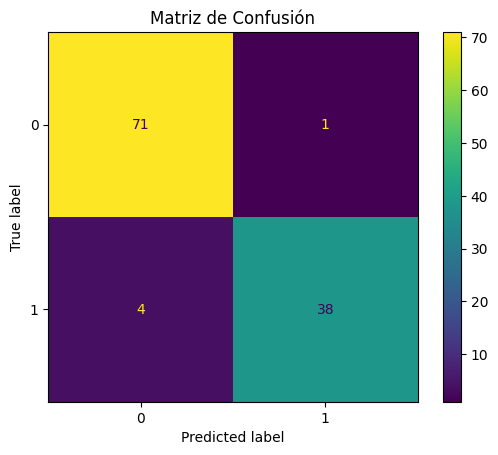

In [ ]:
# matriz de confusión
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
plt.title("Matriz de Confusión")
plt.show()

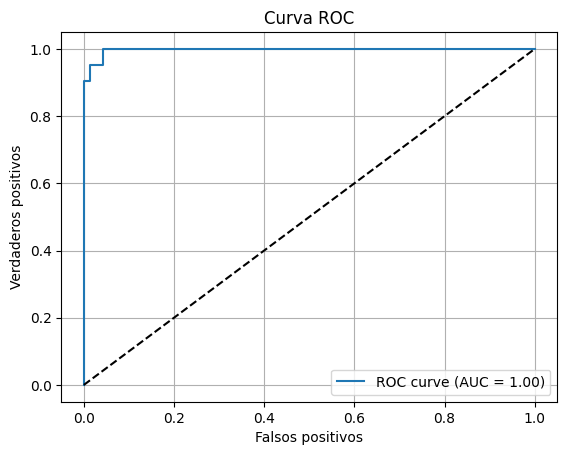

In [20]:
# curva ROC, para ver sensibilidad y especificidad
y_prob = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Exportar el modelo

In [15]:
# guardar el modelo y las columnas usadas
joblib.dump(modelo, "modelo_logistico_cancer.pkl")
joblib.dump(columnas_top10, "columnas_usadas.pkl")


['columnas_usadas.pkl']